
# Numerisk løsning av ikke-lineære ligninger

** Anne Kværnø **

# Problemstilling

Vi vil først se på numeriske teknikker for å løse skalare ligninger (en ligning, en ukjent), for 
eksempel

\begin{equation} 
x^3+x^2-3x=3. 
\end{equation}


eller systemer av ligninger, f.eks.

\begin{align}
xe^y &= 1,    \\
-x^2+y &= 1. 
\end{align}


# Skalare ligninger

Vi starter med å se på skalare ligninger, dvs. ligninger gitt ved

\begin{equation}
f(x) = 0, 
\end{equation}


hvor $f$ er en [kontinuerlig](https://wiki.math.ntnu.no/tma4100/tema/limits?&#kontinuitet) 
funksjon definert på et interval $[a,b]$. 
En løsning $r$ av denne ligningen kalles en *rot* eller et *nullpunkt* av $f$. 


I dette avsnittet vil vi se på følgende:

1. Hvordan kan vi vite om ligningen $f(x)=0$ har en løsning?

2. Er løsningen entydig?

3. Hvordan kan vi konstruere algoritmer for å finne løsningen numerisk? 

4. Og hvor gode er disse algoritmene?

Bruk av [skjæringssetningen](https://wiki.math.ntnu.no/tma4100/tema/limits?&#ekstremalverdisetningen_og_skjaeringssetningen)  gir et svar på spørsmål 1:


##### Skjæringssetningen
Hvis funksjonen $f$ er kontinuerlig på intervallet $[a,b]$ og $f(a)$ og $f(b)$ har motsatt fortegn, 
så har $f$ minst et nullpunkt $r$ i $[a,b]$.

##### Eksempel 
*Gitt funksjonen $f(x)=x^3+x^2-3x-3$ på intervallet $[-2,2]$. 
Siden $f$ er kontinuerlig, $f(-2)=-1$ og $f(2)=3$ vet vi at $f$ har minst en rot i intervallet. 
For å få en viss ide om hvor denne rota ligger, lag et plott:*

In [1]:
# Importer nødvendige moduler, og sett parametre for plotting. 
# Dette må alltid kjøres først!
%matplotlib inline
from numpy import *               # Matematiske funksjoner og lin.alg.
from matplotlib.pyplot import *   # Grafikk
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 16}
rcParams.update(newparams)

In [2]:
# Definer og plott funksjonen
def f(x):
    # Definer funksjonen f(x)
    return x**3+x**2-3*x-3

x = linspace(-2, 2, 101)    # x-grid
plot(x, f(x))               # Plott funksjonen
plot(x, 0*x, 'r')           # Plott x-aksen
xlabel('x')
ylabel('f(x)');


*Figuren viser at $f$ har tre reelle røtter i intervallet $[-2,2]$.*

*Det kan vises at*

$$ f(x) = x^3+x^2-3x-3 = (x+1)(x^2-3) $$

*så $f$ har røttene $-1$ og $\pm \sqrt{3}$. Dette vil brukes for å teste numeriske algoritmer senere.*

_NB!_ Løsning av skalare ligninger var også tema i [Matematikk 1](https://wiki.math.ntnu.no/tma4100/tema/numerics?&#ligningslosere). 


## Halveringsmetoden:
<div id="ulinear:halvering"></div>

Skjæringssetningen kan brukes for å definere vår første numeriske algoritme for å løse $f(x)=0$. Gitt et intervall med en rot, del intervallet i to og sjekk hvilken av halvdelene rota ligger i. Gjenta dette inntil intervallet er så lite at et hvilket som helst tall i intervallet er godt nok.  

### Algoritme

* Gitt funksjonen $f$ og intervallet $[a,b]$, slik at $f(a)\cdot f(b)<0$.

* La $k=0$, og sett $a_0=a$, $b_0=b$.

* For $k=0,1,2,3,.....$

\begin{align*}
     c_k &=\frac{a_k+b_k}{2} \\
     [a_{k+1},b_{k+1}] &=
         \begin{cases} [a_k,c_k] & \text{hvis } f(b_k)\cdot f(c_k) \leq 0 \\
                       [c_k,b_k] & \text{hvis } f(c_k)\cdot f(a_k) \leq 0
         \end{cases}
\end{align*}

Verdien $c_k$ brukes en tilnærmelse til nullpunktet $r$. Forutsatt at betingelsen i punkt 1 er oppfylt vil denne algoritmen alltid finne en løsning. Siden $c_k$ er midpunktet i intervallet $[a_k,b_k]$, vet vi at 
$$
   |c_k-r| < \frac{b_k-a_k}{2},
$$
hvilket betyr at vi stopper når $b_k-a_k \leq 2 tol$, der $tol$ er en toleranse gitt av brukeren. Vi vil selvsagt også stoppe dersom $f(c_k)=0$. 

### Implementasjon

In [3]:
def halveringsmetoden(f, a, b, tol=1.e-6, maks_iter = 100):
    # f:    Kontinuerlig funksjon. 
    # a, b: Intervall: sjekk på forhånd at f(a) og f(b) har motsatt fortegn. 
    # tol : Toleranse
    fa = f(a)
    fb = f(b)
    for k in range(maks_iter):
        c = 0.5*(a+b)
        fc = f(c)
        print('k ={:3d}, a = {:.6f}, b = {:.6f}, c = {:10.6f}, f(c) = {:10.3e}'
              .format(k, a, b, c, fc)) 
        if abs(f(c)) < 1.e-14 or (b-a) < 2*tol:        # Nullpunktet c er funnet!
            break 
        elif fa*fc < 0:               
            b = c                     # Nytt intervall [a, c]
        else:
            a = c                     # Nytt intervall [c, b]  
    return c, k 

### Testing
La oss teste metoden på eksempel [1](#ex:f), $f(x)=x^3+x^2-3x-3$, og finn rota som ligger i mellom 1.5 og 2.0. 

In [4]:
# Definer funksjonen
def f(x):
    return x**3+x**2-3*x-3

# Sett intervallet
a, b = 1.5, 2

# Sjekk at det er minst en rot i intervallet: 
if f(a)*f(b) < 0:
    c, nit = halveringsmetoden(f, a, b, tol=1.e-6)      # Løs ligningen numerisk
    print('\n\nResultat:\nc={},  f(c)={}, antall iterasjoner={}'.format(c, f(c), nit))
else: 
    print('Forutsetningen for halveringsmetoden er ikke oppfyllt.')

k =  0, a = 1.500000, b = 2.000000, c =   1.750000, f(c) =  1.719e-01
k =  1, a = 1.500000, b = 1.750000, c =   1.625000, f(c) = -9.434e-01
k =  2, a = 1.625000, b = 1.750000, c =   1.687500, f(c) = -4.094e-01
k =  3, a = 1.687500, b = 1.750000, c =   1.718750, f(c) = -1.248e-01
k =  4, a = 1.718750, b = 1.750000, c =   1.734375, f(c) =  2.203e-02
k =  5, a = 1.718750, b = 1.734375, c =   1.726562, f(c) = -5.176e-02
k =  6, a = 1.726562, b = 1.734375, c =   1.730469, f(c) = -1.496e-02
k =  7, a = 1.730469, b = 1.734375, c =   1.732422, f(c) =  3.513e-03
k =  8, a = 1.730469, b = 1.732422, c =   1.731445, f(c) = -5.728e-03
k =  9, a = 1.731445, b = 1.732422, c =   1.731934, f(c) = -1.109e-03
k = 10, a = 1.731934, b = 1.732422, c =   1.732178, f(c) =  1.201e-03
k = 11, a = 1.731934, b = 1.732178, c =   1.732056, f(c) =  4.596e-05
k = 12, a = 1.731934, b = 1.732056, c =   1.731995, f(c) = -5.317e-04
k = 13, a = 1.731995, b = 1.732056, c =   1.732025, f(c) = -2.429e-04
k = 14, a = 1.732025

Bekreft at algoritmen faktisk gir oss løsningen med en feil vel innenfor toleransen: 

In [5]:
r = sqrt(3)
print('Feilen |c_k-r|={:.2e}'.format(np.abs(r-c)))

Feilen |c_k-r|=8.81e-08


#### Numeriske  eksperimenter og oppgaver. 
1. Velg passende intervaller og finn de to andre røttene av $f(x)$. 
2. Finn løsningen(e) av ligningen $x^2+\sin(x)-0.5=0$ numerisk. 
3. Gitt en funksjon med en rot i intervallet $[1.5, 2]$. Hvor mange iterasjoner trengs det for å finne løsningen med en feil i absoluttverdi mindre enn $10^{-4}$. 


## Fikspunktiterasjoner
<div id="ulinear:fikspunkt"></div>

Ideen er som følger: 
* Gitt en ligning $f(x)=0$, med rot $r$.
* Skriv den om på formen $x=g(x)$ slik at rota $r$ til $f$ er et _fikspunkt_ $r$ av $g$, dvs. $r=g(r)$. 

###### Eksempel: 
_Ligningen
$$ x^3+x^2-3x-3=0$$ kan skrives om til $$x=\frac{x^3+x^2-3}{3}. $$_

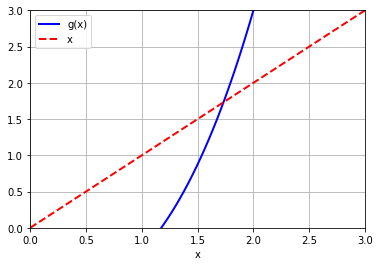

In [6]:
x = linspace(0, 3, 101)
plot(x, (x**3+x**2-3)/3,'b', x, x, '--r' )
axis([0, 3, 0, 3])
xlabel('x')
legend(['g(x)','x']);

Av dette følger *fikspunktiterasjonsskjemaet*: 

* Gitt en startverdi $x_0$. For $k=0,1,2,\dotsc$ la $x_{k+1}=g(x_k)$.

La feilen $e_k=x_k-r$. Fikspunktiterasjonene lager altså en [følge](https://wiki.math.ntnu.no/tma4100/tema/series?&#folger_og_konvergens://wiki.math.ntnu.no/tma4100/tema/limits?&#kontinuitet) ${x_k}$ som [konvergerer](https://wiki.math.ntnu.no/tma4100/tema/series?&#folger_og_konvergens://wiki.math.ntnu.no/tma4100/tema/limits?&#kontinuitet) mot $r$ dersom feilen $e_k=x_k-r \rightarrow 0$ når $k\rightarrow \infty$. 

Spørsmålet blir da hvordan velge $g$ slik at iterasjonene konvergerer, og helst raskt. 

Før dette diskuteres, la oss implementere algoritmen og teste den ut. Iterasjonene stoppes når *feilestimatet* $|x_{k+1}-x_{k}| \leq tol$ (konvergens), eller når et maksimalt antall iterasjoner er nådd (divergens, eller altfor langsom konvergens). 

### Implementasjon

In [7]:
def fikspunkt(g, x0, tol=1.e-8, maks_iter=30):
    # Løser x=g(x) med fikspunktiterasjoner
    # g:  funksjonen g(x)
    # x0: Startverdi for iterasjonene
    x = x0
    print('k ={:3d}, x = {:14.10f}'.format(0, x))
    for k in range(maks_iter):        
        x_old = x                        # Ta vare på den gamle verdien av x for feilestimering. 
        x = g(x)                         # Fikspunktiterasjonen
        feil = abs(x-x_old)              # Feilestimat
        print('k ={:3d}, x = {:14.10f}'.format(k+1, x))
        if feil < tol and k > 0:           # Stopp når løsningen er god nok
            break
    return x, k+1

### Testing

##### Eksempel 2
<div id="ex:fikspunkt"></div>
Fortsett med ligningen $x^3+x^2-3x-3=0$. Den kan f.eks. skrives om som $x=(x^3+x^2-3)/3 = g(x)$. Velg $x_0=1.5$ som startverdi, og la oss håpe $x_k$ går  mot $\sqrt{3}$. 

In [8]:
# Definer funksjonen
def g(x):
    return (x**3+x**2-3)/3

# Utfør iterasjonene
x, nit = fikspunkt(g, x0=1.5, tol=1.e-6, maks_iter=30)

print('\n\nResultat:\nx = {}, antall iterasjoner={}'.format(x, nit))

k =  0, x =   1.5000000000
k =  1, x =   0.8750000000
k =  2, x =  -0.5214843750
k =  3, x =  -0.9566232041
k =  4, x =  -0.9867682272
k =  5, x =  -0.9957053567
k =  6, x =  -0.9985807218
k =  7, x =  -0.9995282492
k =  8, x =  -0.9998428981
k =  9, x =  -0.9999476491
k = 10, x =  -0.9999825515
k = 11, x =  -0.9999941841
k = 12, x =  -0.9999980614
k = 13, x =  -0.9999993538
k = 14, x =  -0.9999997846


Resultat:
x = -0.9999997845980656, antall iterasjoner=14


Så det gjorde den ikke. I stedet konvergerte $x_k$ mot rota $r=-1$. 

#### Numeriske eksperimenter: 
1. Prøv med andre startverdier. Er det mulig å få konvergens mot $r=\sqrt{3}$ med dette valget av $g$?
2. Gjenta eksperimentet med andre omskrivinger av $f(x)=0$ på fikspunktform, f.eks. 
   
   \begin{align}
   x &= g_2(x) = \frac{-x^2+3x+3}{x^2}, \\
   x &= g_3(x) = \sqrt[3]{3+3x-x^2}, \\
   x &= g_4(x) = \sqrt{\frac{3+3x-x^2}{x}}
   \end{align}
   
   Velg startverdi $x_0=1.5$ (men eksperimenter gjerne med andre startverdier også). 



### Teori: 
Så når konvergerer iterasjonene? 

Vi har definisjonene av et fikspunktskjema, og definisjonen av en rot $r$ av $g$:

\begin{align*}
x_{k+1}&=g(x_k), \\
r &= g(r).
\end{align*}

Ved å ta differensen mellom disse og bruker [middelverdisetningen](https://wiki.math.ntnu.no/tma4100/tema/differentiation?&#middelverdisetningen_og_teoremet_om_kritiske_punkt)  som forutsetter at $g$ er kontinuerlig deriverbar,  ser vi at feilen $e_k=x_k-r$ oppfyller: 

\begin{equation}
|e_{k+1}| = |x_{k+1}-r| = |g(x_k)-g(r)| = |g'(\xi_k)|\cdot |x_k-r| = |g'(\xi_k)|\cdot |e_k| 
\end{equation}

der $\xi_k$ er en eller annen ukjent verdi mellom $x_k$ (som vi kjenner) og $r$ (som fortsatt er ukjent). Det er klart at feilen blir mindre hvis $|g'(\xi_k)|<1$, men hvordan kan vi vite om det er tilfelle når $\xi_k$ er ukjent? 

La oss anta at det fins et intervall $[a,b]$ som oppfyller betingelsen 

$$ a < g(x) < b \text{ for alle } x \in [a,b]. $$

Dette sikrer oss to ting: For det første: Hvis $x_0 \in [a,b]$ så vil alle påfølgende iterasjoner $x_k \in (a,b)$. For det andre vil denne betingelsen garantere at vi har en rot $r$ i $(a,b)$, som en konsekvens av skjæringssetningen og at $a-g(a)<0$ mens $b-g(b)>0$. Så la oss anta at det er tilfelle. 

Hvis $|g'(x)|\leq L < 1$ for alle $x\in [a,b]$ får vi:

$$
|e_{k+1}| \leq L \,|e_k| \qquad \Rightarrow \qquad |e_k| \leq L^k \, |e_0| \rightarrow_{k\rightarrow \infty} 0
$$

siden $L^k \rightarrow_{k\rightarrow \infty} 0$ når $L<1$. Iterasjonene $x_k$ konvergerer mot fikspunktet $r$. 

Men kan det være mer enn en rot i intervallet, og hvilken rot konvergerer i så fall iterasjonene mot?

La oss fortsatt anta at $L<1$, og at betingelsene for intervallet $[a,b]$ er oppfyllt. Anta så at det fins to forskjellige fikspunkt, $r$ og $q$. I så fall har vi

$$ |r-q| = |g(r)-g(q)| = |g'(\xi)||r-q| < |r-q| $$ 
    
hvilket ikke er mulig når $q\not= r$. Så under de gitte kriteriene er fikspunktet entydig. 

Vi kan nå samle dette i en setning:

##### Fikspunktsetningen

_Antagelser:_
1. Funksjonen $g$ er kontinerlig på intervallet $[a,b]$ og $g(x) \in (a,b)$ for alle $x\in [a,b]$.
2. Funksjonen $g$ er kontinuerlig deriverbar på $(a,b)$ og det fins en konstant $L<1$ slik at $|g'(x)|\leq L <1$ for alle $x\in(a,b)$.

_Da gjelder:_
1. _Eksistens_: Hvis antagelse 1 er oppfylt har $g$ (minst) et fikspunkt $r$ i  $[a,b]$.

2. _Entydighet_: Hvis antagelse 1 og 2 er oppfylt er fikspunktet $r$ unikt i $[a,b]$.

3. _Konvergens_: Hvis antagelse 1 og 2 er oppfylt vil fikspunktiterasjonene konvergere mot $r$ for alle valg av startverdier $x_0\in[a,b]$.

Fra diskusjonen over kan vi også trekke noen andre konklusjoner, under forutsetning av at 
$g$ er kontinuerlig deriverbar. 
1. Jo mindre $L$, jo raskere konvergens.
2. Hvis $|g'(r)|<1$ vil det alltid finnes et område $(r-\epsilon, r+\epsilon)$ der begge antagelsene er oppfylt. Med andre ord, fikspunktiterasjonene vil alltid konvergere hvis startverdien er god nok.  
3. Hvis $|g'(r)|>1$ vil fikspunktiterasjoner aldri konvergere mot $r$. 


##### Eksempel 2, analyse: 
Vi kan nå bruke dette til å forklare resultatet fra eksempel 2, hvor iterasjonene konvergerte mot $-1$, men ikke mot $\sqrt{3}$. Vi har:

$$ g(x)=\frac{x^3+x^2-3}{3}, \qquad g'(x) = \frac{3x^2+2x}{3} $$

Det er åpenbart at $g$ er kontinuerlig deriverbar. De øvrige antagelsene kan studeres grafisk: 

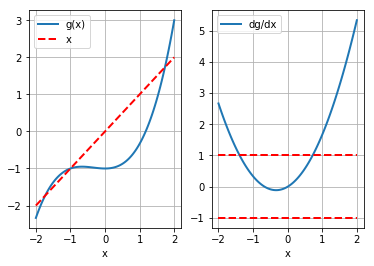

In [9]:
def g(x):
    return (x**3+x**2-3)/3

def dg(x):
    return (3*x**2+2*x)/3

a, b = -2, 2                       # Intervallet [a,b]
x = linspace(a, b, 101)
en = ones(101)                     # For å plotte linjen -1 og 1

# x = g(x) 
subplot(1,2,1)
plot(x, g(x), x, x, 'r--')
xlabel('x')
legend(['g(x)','x'])

# dg(x)
subplot(1,2,2)
plot(x, dg(x), x, en, 'r--', x, -en, 'r--');
xlabel('x')
legend(['dg/dx']);

Figuren til venstre viser grafene $y=x$ og $y=g(x)$, og fikspunktene er skjæringspunktene mellom disse. Figuren til høyre viser $y=g'(x)$ og når denne ligger mellom -1 og 1.

Her ser vi at $g'(x)>1$ for de to ytterste fikspunktene, iterasjonene vil aldri konvergere mot disse. Derimot er $|g'(x)|<1$ i et intervall rundt $-1$, f.eks. i . intervallet $[-1.3, 0]$. Zoom inn figuren på dette området (gjør det selv!). Figuren til høyre viser nå at $g(x)\in [-1.2, -0.9]$ når $x\in [-1.3, 0]$, så antagelse 1 er oppfyllt, og figuren til venstre bekrefter at $|g'(x)|<1$ i dette intervallet. 

Så velges startverdien $x_0\in [-1.3, 0]$ vil iterasjonene konvergere mot det unike fikspunktet i dette intervallet. Det samme vil selvsagt  skje hvis startverdien velges utenfor, men en av iterasjonene $x_k$ tilfeldigvis havner her. 

#### Oppgave
Gjør en tilsvarende analyse av de 3 andre iterasjonsskjemaene forerslått tidligere, dvs.

\begin{align}
   x = g_2(x) = \frac{-x^2+3x+3}{x^2}, \\ 
   x = g_3(x) = \sqrt[3]{3+3x-x^2}, \\ 
   x = g_4(x) = \sqrt{\frac{3+3x-x^2}{x}}
\end{align}


## Newtons metode

Basert på diskusjonen over, er det rimelig å anta at iterasjonene konvergerer svært raskt hvis $g$ velges slik at $g'(r)=0$. Ved å bruke $x_k=r+e_k$, og gjøre en  [Taylorutvikling](https://wiki.math.ntnu.no/tma4100/tema/taylorpolynomials) av $g$ rundt $r$ får vi:

\begin{equation}
   e_{k+1} = x_{k+1}-r = g(x_k)-g(r) = g(r+e_k)-g(r) = g'(r)e_k + \frac{1}{2}g''(\xi_k)e_k^2  
\end{equation}
<a name="ex:Newton_Feilutvikling"></a>

Med andre ord: Hvis $g'(r)=0$ og det fins en konstant $M$ slik at $|g''(x)|/2 \leq M$, 
så vil 

$$ |e_{k+1}| \leq M |e_k|^2 $$ <a name="ex:Newton_feilkonstant"></a>

og vi har oppnådd *kvadratisk konvergens*, uavhengig av størrelsen på $M$. 

*Spørsmål:* Gitt $f$ (men ikke $r$), hvordan finne $g$ slik at $g'(r)=0$? 

*Ide:* La 

$$ x=x-h(x)f(x) = g(x). $$

for en eller annen kontinuerlig funksjon $h(x)$. Uansett valg av $h$ vil en rot $r$ være et fikspunkt av $g$. Velg $h(x)$ slik at $g'(r)=0$, dvs: 

$$ 
g'(x) = 1 - h'(x)f(x) - h(x)f'(x) \qquad \Rightarrow \qquad
g'(r) = 1 - h(r)f'(r)
$$ 

Ved å velge $h(x)=1/f'(x)$ vil $g'(r)=0$. Dette resulterer i følgende algoritme:
* Gitt en startverdi $x_0$. For $k=0,1,2,\dotsc$ la 
  $$x_{k+1}=x_k - \frac{f(x_k)}{f'(x_k)}, $$ 
  
Metoden er godt kjent under navnet 
[Newtons metode](https://wiki.math.ntnu.no/tma4100/tema/numerics?&#ligningslosere), og kan utledes på mange andre måter enn slik det er gjort her. 

### Implementasjon

In [10]:
def newton(f, df, x0, tol=1.e-14, maks_iter=10):
    # Løser ligningen f(x)=0 med Newtons metode
    # f, df: Funksjonen og dens deriverte
    # x0   : Startverdi
    x = x0
    print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(0, x, f(x)))
    for k in range(maks_iter):
        fx = f(x)
        if abs(fx) < tol:          # Løsningen er tilstrekkelig nøyaktig
            break 
        x = x - fx/df(x)            # Newton-iterasjonen
        print('k ={:3d}, x = {:18.15f}, f(x) = {:10.3e}'.format(k+1, x, f(x)))
    return x, k+1
    

### Testing

La atter igjen $f(x) = x^3+x^2-3x-3$, med $f'(x)=3x^2+2x-3$. Velg $x_0=1.5$. 

In [11]:
def f(x):
    return x**3+x**2-3*x-3

def df(x):
    return 3*x**2+2*x-3

x0 = 1
# Utføre iterasjonene
x, nit = newton(f, df, x0, tol=1.e-14, maks_iter=30)

print('\n\nResultat:\nx={}, antall iterasjoner={}'.format(x, nit))

k =  0, x =  1.000000000000000, f(x) = -4.000e+00
k =  1, x =  3.000000000000000, f(x) =  2.400e+01
k =  2, x =  2.200000000000000, f(x) =  5.888e+00
k =  3, x =  1.830150753768844, f(x) =  9.890e-01
k =  4, x =  1.737795453142821, f(x) =  5.457e-02
k =  5, x =  1.732072291544954, f(x) =  2.033e-04
k =  6, x =  1.732050807871055, f(x) =  2.860e-09
k =  7, x =  1.732050807568877, f(x) =  1.776e-15


Resultat:
x=1.7320508075688774, antall iterasjoner=8


### Feilanalyse
Metoden ble utledet for å gi kvadratisk konvergens, dvs. 
$$ |e_{k+1}| \leq M |e_k|^2, $$
der $e_k=x_k-r$ er feilen etter $k$ iterasjoner. 
Men under hvilke betingelser er dette riktig, og kan vi si noe om størrelsen på konstanten $M$?

Ved å gjøre en [Taylorutvikling](https://wiki.math.ntnu.no/tma4100/tema/taylorpolynomials)
av $f(r)$ rundt punktet $x_k$, og ved å omskrive Newtons metode litt, får vi:

\begin{align}
  0 = f(r) &= f(x_k) + f'(x_k)(r-x_k) + \frac{1}{2}f''(\xi_k)(r-x_k)^2  
&& \text{(Taylorutvikling)} \\
   0 &= f(x_k) + f'(x_k)(x_{k+1}-x_k) && \text{(Newtons metode)}
\end{align}

der $\xi_k$ ligger mellom $r$ og $x_k$. 

Ta differansen mellom disse ligningene:  

$$
f'(x_k)(x_{k+1}-r) - \frac{1}{2}f''(\xi_{k})(x_k-r)^2 = 0 
\qquad \Rightarrow \qquad
e_{k+1} = \frac{1}{2} \frac{f''(\xi_k)}{f'(x_k)} e_k^2
$$

Vi har altså kvadratisk konvergens hvis $f$ er to ganger kontinuerlig deriverbar i et område rundt $r$, hvis $f'(x_k) \not =0$, og startverdien $x_0$ velges tilstrekkelig nært $r$. La oss oppsummere dette:

##### Setning: Konvergens av Newtons metode
Anta at: 
* Funksjonen $f$ har en rot $r$, dvs. $f(r)=0$.
* Funksjonen $f$ er to ganger kontinuerlig deriverbar på et område rundt $r$, dvs. på $I_\delta=[r-\delta, r+\delta]$ for en $\delta > 0$.
* Den andrederiverte $f''(x) \not= 0$ på $I_{\delta}$. 
* Det fins en konstant $M$ slik at 
  $$ \left| \frac{f''(y)}{f'(x)} \right| \leq 2M. $$

Under disse antagelsene konverger Newtons metode kvadratisk med 

$$ |e_{k+1}| \leq M |e_k|^2. $$ 

for alle startverdier $x_0$ som tilfredstiller $|x_0-r| \leq \min{1/M, \delta}$.

#### Numeriske eksperimenter

1. Velg andre startverdier, og se om du kan finne de to andre røttene. 
2. Modifiser funksjonen `newton` slik at den skriver ut feilen for hver iterasjon (det forutsetter eksakt løsning er kjent). Bruk dette til å verifisere kvadratisk konvergens. Finn et estimat for $M$. 
3. Gitt ligningen $x(1-\cos(x))=0$, løs denne både med halveringsmetoden med startintervall $[-2,1]$ og med Newtons metode med startverdi $x_0=1$. Kommenter resultatet.  

## Oppsummering:
I denne seksjonen har vi sett på tre ulike metoder for å løse skalare ulineære ligninger. 
Under forutsetning av at antagelsene gjort underveis for de enkelte metodene er oppfylt:
* *Halveringsmetoden:* Konvergerer alltid, uavhengig av $f$, men den konvergerer langsomt. 
* *Fikspunktiterasjoner:* Dette er mer en klasse av metoder, ikke en enkelt metode i seg selv. Det kan være vanskelig å finne gode valg av $g$, derfor brukes i praksis disse bare når dette valget er mer eller mindre gitt fra problemstillingen. 
* *Newtons metode:* Konvergerer alltid for startverdier tilstrekkelig nær løsningen. Konvergerer raskt. Gode startverdier kan være vanskelig å finne. Krever $f'(x)$. 

# Systemer av ikke-lineære ligninger

I dette avsnittet skal vi se på hvordan en kan løse systemer av ikke-lineære ligninger, gitt ved

\begin{align*}
   f_1(x_1, x_2, \dotsc, x_n) &= 0 \\
   f_2(x_1, x_2, \dotsc, x_n) &= 0 \\
                              & \vdots  \\
   f_n(x_1, x_2, \dotsc, x_n) &= 0 \\
\end{align*}

eller mer kompakt som 

$$ \mathbf{f}(\mathbf{x}) = \mathbf{0}. $$

der $\mathbf{f}:\mathbb{R}^n \rightarrow \mathbb{R}^n$. 

##### Eksempel 3
<a name="ex:Newton_a"></a>

\begin{align}
x_1^3-x_2 + \frac{1}{4} &= 0  \tag{2} \\
x_1^2+x_2^2 - 1  &= 0 \nonumber
\end{align}

De to ligningene kan illustreres ved følgende plott: 

In [12]:
x = linspace(-1.0, 1.0, 101)
plot(x, x**3+0.25);
t = linspace(0,2*pi,101)
plot(cos(t), sin(t)); 
axis('equal');
xlabel('x1')
ylabel('x2')
legend(['x1^3-x2=0','x1^2+x2^2-1=0']);

Ligningssystemet har altså to løsninger, en i 1. og en i 3. kvadrant. Dette eksempelet vil bli brukt som testeksempel senere i avsnittet. 

## Newtons metode for systemer 

For illustrasjonens skyld, se på et system med to ligninger og to ukjente, gitt ved

\begin{align}
f_1(x_1, x_2) &= 0 \\
f_2(x_1, x_2) &= 0 
\end{align}

Anta at denne har en eksakt, men ukjent løsning $\mathbf{r}= [r_1, r_2]^T$. Anta videre at vi kjenner en tilnærmelse til løsningen, $\hat{\mathbf{x}} = [\hat{x}_1, \hat{x}_2]^T.$  Bruk [lineærapproksimasjon ved tangentplan]( https://wiki.math.ntnu.no/tma4105/tema/partiellderiverte) rundt $\hat{\mathbf{x}}$ som tilnærmelser for hver av de to funksjonene, dvs. 

\begin{align*}
   f_1(x_1, x_2) & \approx L_1(x_1,x_2) = f_1(\hat{x}_1, \hat{x}_2) 
   + \frac{\partial f_1}{\partial x_1}(\hat{x}_1, \hat{x}_2)(x_1 - \hat{x}_1)
   + \frac{\partial f_1}{\partial x_2}(\hat{x}_1, \hat{x}_2)(x_2 - \hat{x}_2) \\
   f_2(x_1, x_2) & \approx L_2(x_1,x_2) = f_2(\hat{x}_1, \hat{x}_2) 
   + \frac{\partial f_2}{\partial x_1}(\hat{x}_1, \hat{x}_2)(x_1 - \hat{x}_1)
   + \frac{\partial f_2}{\partial x_2}(\hat{x}_1, \hat{x}_2)(x_2 - \hat{x}_2) \\
\end{align*}

og løs systemet av lineære ligninger $L_1(x_1,x_2)=0, L_2(x_1,x_2)=0$ mhp. $x_1$ og $x_2$.  På vektor/matriseform blir dette

$$
  \mathbf{f}(\hat{\mathbf{x}}) + J(\hat{\mathbf{x}})(\mathbf{x}-\hat{\mathbf{x}}) = 0,
$$

der Jacobimatrisen $J(\mathbf{x})$ er gitt ved

$$ 
J(\mathbf{x}) =\begin{bmatrix}
\frac{\partial f_1}{\partial x_1}(x_1, x_2) & \frac{\partial f_1}{\partial x_2}(x_1, x_2) \\
\frac{\partial f_2}{\partial x_1}(x_1, x_2) & \frac{\partial f_2}{\partial x_1}(x_1, x_2)
\end{bmatrix}
$$

Se under [testing](#ex:Newton) for et eksempel. 

Det er vel rimelig å anta at løsningen $\mathbf{x}$ av den lineære ligningen er en bedre tilnærmelse til den eksakte løsningen $\mathbf{r}$ enn $\hat{x}$, og prosessen kan gjentas. Sett $\mathbf{x}_k=\hat{x}$ og $\mathbf{x}_{k+1} = \mathbf{x}$, og vi har Newtons metode for systemer av ligninger: Gitt en startverdi $\mathbf{x}_0$. For $k=0,1,\dotsc$, løs ligningen 

$$
    \mathbf{f}(\mathbf{x}_k) + J(\mathbf{x}_k)(\mathbf{x}_{k+1}-\mathbf{x}_k) = 0.
$$

med hensyn på $\mathbf{x}_{k+1}$. 
Denne algoritmen gjelder også for systemer av dimensjon $n > 2$, i så fall er jakobimatrisen gitt ved

$$ 
J(\mathbf{x}) =\begin{bmatrix}
\frac{\partial f_1}{\partial x_1}(\mathbf{x}) & 
\frac{\partial f_1}{\partial x_2}(\mathbf{x}) & \dotsm & 
\frac{\partial f_1}{\partial x_n}(\mathbf{x}) \\
\frac{\partial f_2}{\partial x_1}(\mathbf{x}) & 
\frac{\partial f_2}{\partial x_2}(\mathbf{x}) & \dotsm & 
\frac{\partial f_2}{\partial x_n}(\mathbf{x}) \\
\vdots & \vdots & & \vdots \\
\frac{\partial f_n}{\partial x_1}(\mathbf{x}) & 
\frac{\partial f_n}{\partial x_2}(\mathbf{x}) & \dotsm & 
\frac{\partial f_n}{\partial x_n}(\mathbf{x}) 
\end{bmatrix}
$$



### Algoritme 
* Gitt vektorfunksjonen $\mathbf{f}$, Jacobimatrisen $J(x)$ og en startverdi $\mathbf{x}_0$. 
* For $k=0,1,2,\dotsc$:
    * Beregn $\mathbf{f}(\mathbf{x}_k)$ og $J(\mathbf{x}_k)$.
    * Løs ligningssystemet $J(\mathbf{x}_k) \Delta \mathbf{x_k} = - \mathbf{f}(\mathbf{x}_k)$. 
    * La $\mathbf{x}_{k+1} = \mathbf{x}_k + \Delta \mathbf{x_k}$.
    * Stopp når $\|\mathbf{f}(\mathbf{x}_k)\| \leq tol$.

Her er $\|\mathbf{f}\|$ en  [normen](#norm) av $\mathbf{f}$. 

Metodens konvergensegenskaper kan oppsummeres slik: Hvis $\mathbf{f}$ er tilstrekkelig deriverbar, $\mathbf{r}$ er en løsning av ligningssystemet $\mathbf{f}(\mathbf{x})=0$ og $J(\mathbf{r})$ er ikke-singulær, så vil Newton-iterasjonene konvergere kvardratisk mot $\mathbf{r}$ for alle startverdier tilstrekkelig nær $\mathbf{r}$. 

### Implementasjon

In [13]:
from numpy.linalg import solve, norm    # Til senere bruk
set_printoptions(precision=15)          # Utskrift med 15 siffers nøyaktighet

def newton_sys(f, jac, x0, tol = 1.e-10, max_iter=20):
    x = x0
    print('k ={:3d}, x = '.format(0), x)
    for k in range(max_iter):
        fx = f(x)
        if norm(fx, inf) < tol:          # Løsningen er tilstrekkelig nøyaktig
            break
        Jx = jac(x)
        delta = solve(Jx,fx) 
        x = x - delta            
        print('k ={:3d}, x = '.format(k+1), x)
    return x, k
    

### Testing 

Bruk ligningene fra [eksempel 3](#ex:Newton_a):

\begin{align*}
x_1^3-x_2 + \frac{1}{4}&= 0, \\
x_1^2+x_2^2 - 1 &=0 
\end{align*}

Her er: 

$$
\mathbf{f}(\mathbf{x}) = 
\begin{bmatrix} 
x_1^3-x_2 + \frac{1}{4} \\ 
x_1^2+x_2^2 - 1 
\end{bmatrix} \qquad \text{og Jacobimatrisen  er} \qquad
J(\mathbf{x})  = 
\begin{bmatrix}
3x_1^2 & -1 \\ 2x_1 & 2x_2
\end{bmatrix}
$$

Ligningen har to løsninger, en i 1. og en i 3. kvadrant. For å finne den første, velg startverdien $\mathbf{x}_0=[1,1]^T$. 

In [14]:
# NB! I python begynner indekseringen på 0

# Definer funksjonen. 
# Inn: et array av dimensjon n
# Ut:  et array av samme dimensjon.
def f(x):
    y = array([x[0]**3-x[1]+0.25, 
         x[0]**2+x[1]**2-1])
    return y


# Definer Jacobimatrisen 
# Inn: Et array av dimensjon n
# Ut:  Et array av dimensjon n x n. 
def jac(x):
    J = array([[3*x[0]**2, -1],
         [2*x[0],    2*x[1]]])
    return J

# Startverdier
x0 = array([1.0, 1.0])

# Løs ligningen (hvis mulig)
x, nit = newton_sys(f, jac, x0, tol = 1.e-12)

print('\nTest: f(x)={}'.format(f(x)))

k =  0, x =  [1. 1.]
k =  1, x =  [0.8125 0.6875]
k =  2, x =  [0.750687815833801 0.663959854014599]
k =  3, x =  [0.746302675769953 0.665623251157924]
k =  4, x =  [0.746281278080405 0.665630719318386]
k =  5, x =  [0.746281277575054 0.665630719499142]

Test: f(x)=[1.110223024625157e-16 0.000000000000000e+00]


#### Numeriske eksperimenter
1. Finn løsningen i 3. kvadrant ved å velge andre startverdier. 
2. Bruk Newtons metode på ligningssystemet
   \begin{align}
   x e^y &= 1 \\
   -x^2 +y &= 1
   \end{align}
   med startverdier $x_0=y_0=0$.



### Appendix: 
##### Normer: 
<a name="norm"></a>
La $\mathbf{x}=[x_1,\cdots,x_2]\in \mathbb{R}^n$.  To vanlige uttrykk for lengden (eller normen) av $\mathbf{x}$ er 

$$
 \|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}, \qquad \|\mathbf{x}\|_{\infty} = \max_i|x_i|. 
$$